A Python class would be great way to represent the information for a user. A class is a blueprint for creatig objects. Everything in Python is an object belonging to some class. Here's the simplest possible class in Python, with nothing in it:

In [1]:
class User:
    pass

We can create or instantiate an object of the class by calling it like a function.

In [2]:
user1 = User()

In [3]:
user1

In [4]:
type(user1)

__main__.User

The object `user1` does not contain any useful information. Let's add a constructor method to the class to store some attributes.

In [1]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User Created!')

In [2]:
user2 = User('john','John Doe', 'john@doe.com')

User Created!


In [3]:
user2

Here's what's happening above (conceptually):
- Python creates an empty object of the type user and stores in the variable user2
- Python then invokes the function `User.__init__` with the arguments `user2`, `"john"`, `"John Doe"` and `"john@doe.com"`
- As the `__init__` function is executed, the properties `username`, `name` and `email` are set on the object `user2` 

In [4]:
user2.name

'John Doe'

In [5]:
user2.email, user2.username

('john@doe.com', 'john')

In [6]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User Created!')
    
    def introduce_yourself(self, guest_name):
        print("Hi {}, I'm {}! Contact me at {}.".format(guest_name, self.name, self.email))

In [7]:
user3 = User('jane', 'Jane Doe', 'jane@doe.com')

User Created!


In [8]:
user3.introduce_yourself('David')

Hi David, I'm Jane Doe! Contact me at jane@doe.com.


When we try to invoke the method `user3.introduce_yourself`, the object `user3` is automatically passed as the first argument `self`. Indeed, the following statement is equivalent to the above statement.

Finally, we'll define a couple of helper methods to display user objects nicely within Jupyter Notebook. 

In [27]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User Created!')
    
    def __repr__(self):
        return "User(username = '{}', name = '{}', email = '{}')".format(self.username, self.name, self.email)

    def __str__(self):
        return self.__repr__()    

In [28]:
user5 = User('jane', 'Jane Doe', 'jane@doe.com')

User Created!


In [29]:
user5

User(username = 'jane', name = 'Jane Doe', email = 'jane@doe.com')

**Output**  
We can also express our desired data structures as a Python class `UserDatabase` with four methods: `insert`, `find`, `update` and `list_all`. 

In [30]:
class UserDatabase:
    def insert(self, user):
        pass

    def find(self, username):
        pass

    def update(self, user):
        pass

    def list_all(self):
        pass        

It's a good programming practise to list out the signatures of different class functions before we actually implement the class.

## 2. Come up with some example inputs & outputs.   
Let's create some sample user profiles that we can use to test our fucntions once we implement them.

In [31]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

User Created!
User Created!
User Created!
User Created!
User Created!
User Created!
User Created!


In [32]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]

We can access different fields within a user profile object using the `.`(dot) notation.

In [33]:
biraj.username, biraj.email, biraj.name

('biraj', 'biraj@example.com', 'Biraj Das')

We can also view the string representation of the object, since defined the `__repr__` and `__str__` methods. 

In [34]:
print(aakash)

User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com')


In [35]:
users

[User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com'),
 User(username = 'biraj', name = 'Biraj Das', email = 'biraj@example.com'),
 User(username = 'hemanth', name = 'Hemanth Jain', email = 'hemanth@example.com'),
 User(username = 'jadhesh', name = 'Jadhesh Verma', email = 'jadhesh@example.com'),
 User(username = 'siddhant', name = 'Siddhant Sinha', email = 'siddhant@example.com'),
 User(username = 'sonaksh', name = 'Sonaksh Kumar', email = 'sonaksh@example.com'),
 User(username = 'vishal', name = 'Vishal Goel', email = 'vishal@example.com')]

Since we haven't implemented our data structure yet, it's not possible to list sample outputs.  
However you can try to come up with different scenarios to test future implementations.  
  
**Exercise:** List some scenarios for testing the class method `insert`, `find`, `update` and `list_all`.  
  
1. Insert:  
        A. Inserting into an empty database for users.  
        B. Trying to insert a user with a username that already exists.  
        C. Inserting a user with a username that does not exist.
2. Find:
3. Update
4. List

## Come up with a correct solution. State it in plain English.
Here's a simple and easy solution to the problem: we store the `User` objects in a list sorted by usernames.
The various functions can be implemented as follows:
1. **Insert:** Loop through the list and add the new user at a position that keeps the list sorted.  
2. **Find:** Loop through the list and find the user object with the username matching the query.  
3. **Update:** Loop through the list, find the user object matching the query and update the details.  
4. **List:** Return the list of user objects.
  
We can use the fact usernames, which are strings can be compared using `<`, `>` and `==` operators in python.

In [36]:
'biraj' < 'hemanth'

True

## 4. Implement the solution and test it using example inputs.
The code for implementing the above solution is also fairly straightforward.

In [37]:
class UserDatabase:
    def __init__(self):
        self.users = []
    
    def insert(self, user):
        i=0
        while i < len(self.users):
            # Find the first username greater than the new user's username
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)
    
    def find(self, username):
        for user in self.users:
            if user.username == username:
                return user
    
    def update(self, user):
        target = self.find(user.username)
        target.name, target.email = user.name, user.email
    
    def list_all(self):
        return self.users

We can create a new database of users by _instantiating_ and object of the `UserDatabase` class.

In [38]:
database = UserDatabase()

Let's insert some entries into the object.

In [39]:
database.insert(hemanth)
database.insert(aakash)
database.insert(siddhant)

We can now retrieve the data for a user, given the username.

In [40]:
user = database.find('siddhant')
user

User(username = 'siddhant', name = 'Siddhant Sinha', email = 'siddhant@example.com')

Let's try changing the information for a user.

In [41]:
database.update(User(username='siddhant',name='Siddhant U', email='siddhantu@example.com'))

User Created!


In [42]:
user = database.find('siddhant')
user

User(username = 'siddhant', name = 'Siddhant U', email = 'siddhantu@example.com')

Finally, we can retrieve a list of users in alphabetical order.

In [43]:
database.list_all()

[User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com'),
 User(username = 'hemanth', name = 'Hemanth Jain', email = 'hemanth@example.com'),
 User(username = 'siddhant', name = 'Siddhant U', email = 'siddhantu@example.com')]

Let's verify that a new user is inserted into the correct position.

In [44]:
database.insert(biraj)

In [45]:
database.list_all()

[User(username = 'aakash', name = 'Aakash Rai', email = 'aakash@example.com'),
 User(username = 'biraj', name = 'Biraj Das', email = 'biraj@example.com'),
 User(username = 'hemanth', name = 'Hemanth Jain', email = 'hemanth@example.com'),
 User(username = 'siddhant', name = 'Siddhant U', email = 'siddhantu@example.com')]

The user `biraj` was inserted just before `hemanth`, as expected.  
**Exercise:** Use the empty cells beow to test the various scenarios you listed in step 2 above.

## 5. Analyze the algorithm's complexity and identify inefficiencies.  
The operations `insert`, `find` & `update` involves iterating over a list of users, in the worst case, they may take up to `N` iterations to return a result, where `N` is the total number of users. `list_all` however, simply returns the existing internal list of users.  

Thus, the time complexities of the various operations are:
1. Insert: **O(N)**
1. Find: **O(N)**
1. Update: **O(N)**
1. List: **O(1)**
  
**Exercise:** Verify that the space complexity of each operation is O(1).

Is this good enough? To get a sense of how long each function might take if there are 100 million users on the platform, we can simply run a `for` or `while` loop on 10 million numbers.  

In [46]:
%%time
for i in range(100000000):
    j = i*i

CPU times: total: 10.3 s
Wall time: 10.3 s


The `%%time` magic command is specific to Jupyter Notebook or IPython environments and is used to measure the execution time of the entire code cell it is applied to.

It takes almost 10 seconds to execute all the iterations in the above cell.
- A 10-second delay for fetching user profiles will lead to suboptimal users experience and may cause many users to stop using the platform altogether.
- The 10-second processing time for each profile request will also significantly limit the number of users that can access the platform at a time or increase the cloud infrastructure costs for the company by millions of dollars.
  
As a senior backend engineer, you must come up with a more efficient data structure! Choosing the right data structure for the requirements at hand is an important skill. It's apparent that a sorted list of users might not be the best data structure to organize profile information for millions of users.

## 6. Apply the right technique to overcome the inefficiency  
We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a **binary tree:**  
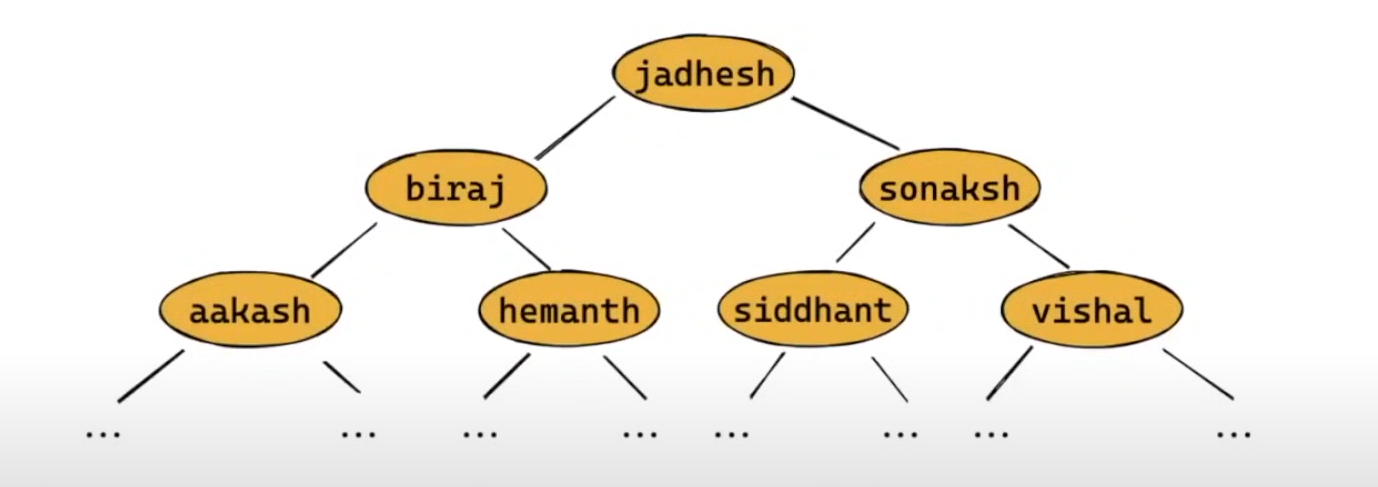
  
It's called a tree because it vaguely like an inverted tree trunk with branches.  
- The word "binary" indicates that each "node" in the tree can have atmost 2 children (left or right).
- Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
- The single node at the top is called the "root" node, and it typically where operations like search, insert etc. begin.

## Balanced Binary Search Tree

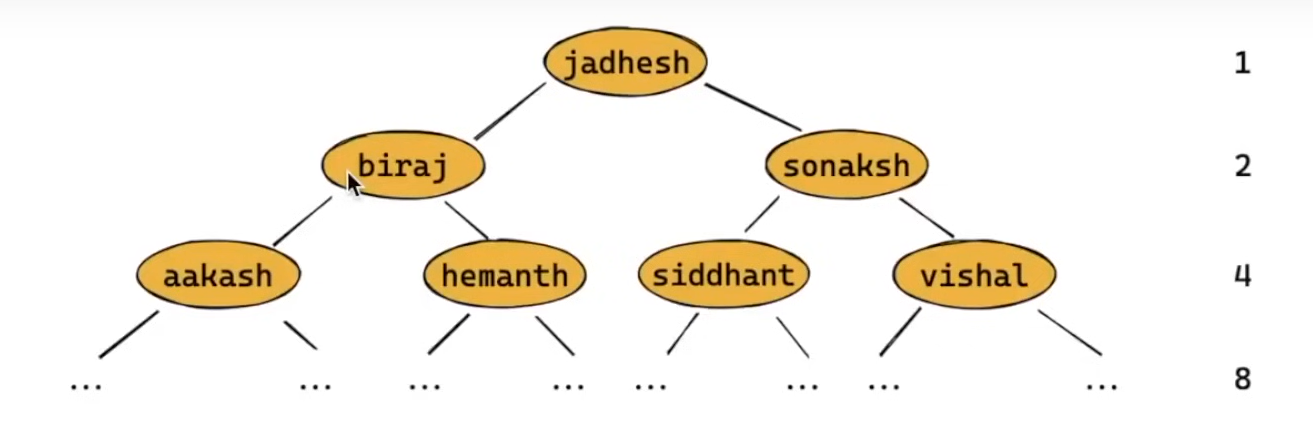
For our use case, we require the binary tree to have some additional properties:  
1. **Keys & Values:** Each node of the tree stores a key (a username) and a value (a `User` object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a map or treemap (because it maps keys to values).
2. **Binary Search Tree:** The left subtree of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the right subtree of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called **binary search trees**, and it's easy to locate a specific key by traversing a single path down from the root note.
3. **Balance Tree:** The tree is **balanced** i.e. it does not skew too heavily to one side or the other. The left or the right subtrees of any node shouldn't differ in height/ depth by more than 1 level. 